# Time Series Forecasting Population Dynamics of Chitala Fish from Catch Data in Malancha site using Machine Learning Techniques.

First we need to install required packages :
    * pip install tensorflow==1.13.1
    * pip install keras==2.3.1
    * pip install sklearn

Import all required libraries in notebook using following codes:

In [6]:
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
 

In this study, we have developed different Long Short-Term Memory (LSTM) models which are basically deep network architectures were tested for forecasting populations of Chitala Fish in Malancha. An approach was proposed to capture the temporal evolution of the population of Chitala based on the time series that model the size of population information. LSTM model is a type of recurrent neural network capable of learning order dependence in sequence prediction problems. The structure allows RNN to retain temporal relationships by creating an association between the current time-step and previous time-step The approach showed significant performance and has proven to be able to forecast population size in coming years. We have used bootstrap procedure to resample the original data a number of times and calculated the statistic of interest.

We have imported LSTM function from Keras package. Since our data is continuous, root mean squared error was used which allows us conducting a selection of best models for each site.

## Conv LSTM

In [1]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [10]:
    for w in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, 1, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_step2, n_features)))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_step1)

        x_input = x_input.reshape((x_input.shape[0], n_seq,1, n_step2, n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
    
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

       
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Convlstm_M.csv', index=None)

Using TensorFlow backend.
E:\spatial\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\spatial\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\spatial\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\spatial\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a s

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
RMSE 3.2552888970919365
Confidence Interval : 3.2773513937016334 8.80387781619827
RMSE 3.4313308813076215
Confidence Interval : 3.120208851324199 10.354659446252706
RMSE 4.174870422330204
Confidence Interval : 1.3897259250758784 11.146614788425097
RMSE 4.09466426125661
Confidence Interval : 1.8094765524379612 11.719478907156766
RMSE 2.716879627970162
Confidence Interval : 5.226594844366931 9.988421520684339
RMSE 3.29060960444619
Confidence Interval : 3.200625959590324 8.703792985722176
RMSE 3.182088152091449
Confidence Interval : 3.8305927513943203 10.310168147195768
RMSE 2.8685401851182335
Confidence Interval : 4.7955915076611175 10.159931029570327
RMSE 3.342147871647365
Confidence Interval : 3.1993615235522084 9.850774565772742
RMSE 3.6771007074263213
Confidence Interval : 3.6083056190959057 12.079382731581585
RMSE 4.28424313157936
Confidence Interval : 1.1531765201

## Vanilla LSTM

In [2]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Embedding
import numpy as np
import pandas as pd
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))

        # choose a number of time steps
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)

        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()

        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
    
        # compile model
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        # fit model

        history=model.fit(X, y, epochs=200, verbose=0)
        
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
   
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Vanillalstm_M.csv', index=None)

RMSE 3.6710445560840252
Confidence Interval : 7.119227190804045 11.416321973014314
RMSE 3.5063985809474203
Confidence Interval : 7.196250005759595 11.035242990456226
RMSE 3.4898030883998112
Confidence Interval : 6.6306576400214485 10.804534680060472
RMSE 3.5513476220128717
Confidence Interval : 6.936189777521745 10.911220954323687
RMSE 3.448232759281844
Confidence Interval : 6.266976275299982 10.169248238283732
RMSE 3.5702631052306035
Confidence Interval : 7.640572434026021 11.272957703777797
RMSE 3.4361830420429027
Confidence Interval : 7.130725020911257 10.684972225216402
RMSE 3.808169421006809
Confidence Interval : 7.61678817255174 11.881184103923953
RMSE 4.210199335413694
Confidence Interval : 8.034352233046258 13.007375468776656
RMSE 3.477600095484076
Confidence Interval : 6.873016058283126 10.749203875120736
RMSE 3.4505376859334844
Confidence Interval : 7.610203491117031 11.04890837954269
RMSE 4.016679136959512
Confidence Interval : 8.060731161919728 12.535975016533504
RMSE 3.392

## Stacked LSTM

In [3]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [7]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

    
        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
 
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Stackedlstm_M.csv', index=None)

RMSE 3.6120528835633787
Confidence Interval : 4.290435645282557 10.873685028850744
RMSE 9.393431441794236
Confidence Interval : 7.910104014560301 23.712669346645757
RMSE 4.064050410366886
Confidence Interval : 5.064395619176237 13.343137644983921
RMSE 3.865657214381979
Confidence Interval : 4.304648320359315 10.892769129591859
RMSE 4.171041545072727
Confidence Interval : 4.206112672394685 13.462282560759611
RMSE 3.275267166180167
Confidence Interval : 5.218321750821044 9.893262721835207
RMSE 5.100291772826572
Confidence Interval : 4.9014033325100685 16.471911524972842
RMSE 3.6073410450782935
Confidence Interval : 6.051904806137154 11.792546907424859
RMSE 4.5541364393234245
Confidence Interval : 5.729089714130617 14.785898040691162
RMSE 8.171195207487353
Confidence Interval : 9.206876356345209 20.574110048073738
RMSE 4.600001405847982
Confidence Interval : 8.901646934377782 13.939935173166164
RMSE 6.281335400543316
Confidence Interval : 6.761575039531526 18.235231295917696
RMSE 3.226727

## Bidirectional LSTM

In [4]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [7]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)

        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Bidirectional_M.csv', index=None)

RMSE 4.363324074565744
Confidence Interval : 2.8014174085079278 15.594406642395395
RMSE 4.372149060815128
Confidence Interval : 1.7684573983503649 9.175645365779275
RMSE 4.592897164694448
Confidence Interval : 1.6129758090933892 14.563035276416866
RMSE 3.5267753529653256
Confidence Interval : 4.073585719561569 10.231848507428177
RMSE 3.3044314828071597
Confidence Interval : 4.973896641148078 9.839806323634637
RMSE 3.3657431084359937
Confidence Interval : 4.55939122604706 10.774127565151671
RMSE 3.1484083171875707
Confidence Interval : 5.309034386725978 9.035643347649023
RMSE 3.4115036590257333
Confidence Interval : 4.634003349117058 12.680873588749154
RMSE 3.5077316530846314
Confidence Interval : 3.1273380622456797 11.92844158558147
RMSE 3.7021279653680033
Confidence Interval : 2.609307123218194 11.789626764263495
RMSE 2.6593278130023705
Confidence Interval : 5.5150316716178835 9.756775236035926
RMSE 3.9157841882664837
Confidence Interval : 3.4984422111672346 12.14319978712378
RMSE 4.0

## CNN LSTM

In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [10]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        
        
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_step2, n_features)))
        model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
        model.add(TimeDistributed(Flatten()))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction
        x_input, y_input = split_sequence(test_data.Value, n_step1)

        x_input = x_input.reshape((x_input.shape[0], n_seq, n_step2, n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
    
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('CNN_M.csv', index=None)

RMSE 0.7890836283886689
Confidence Interval : 5.6489193790001515 8.705956662412202
RMSE 2.6703419608224994
Confidence Interval : 4.565935735877884 8.120607728782762
RMSE 3.351950797290059
Confidence Interval : 3.090737390167826 9.376729917876608
RMSE 3.8757250089684345
Confidence Interval : 3.775950536730895 12.779690160748352
RMSE 2.3483839898733763
Confidence Interval : 5.567401904279434 8.812476139848984
RMSE 3.3603774104556314
Confidence Interval : 4.164141577627255 11.40885789975922
RMSE 4.4526024806424775
Confidence Interval : 0.6502904006774157 9.99261221200874
RMSE 1.8267223667654253
Confidence Interval : 6.619771180007266 7.8139975692297945
RMSE 2.5346568427747465
Confidence Interval : 5.650405512888573 9.684547318379739
RMSE 4.709618245749505
Confidence Interval : 0.10594748048769809 11.250506653499729
RMSE 2.981764802812331
Confidence Interval : 3.9075005825499134 7.899703187133925
RMSE 1.0360769052060492
Confidence Interval : 6.606170731168123 8.425215167421964
RMSE 0.94984

In [4]:
# Creating a dataframe
import pandas as pd
Models=['Convlstm_M','Vanillalstm_M','Stackedlstm_M','Bidirectional_M','CNN_M']
Modelss=['Conv LSTM','Vanilla LSTM','Stacked LSTM','Bidirectional LSTM','CNN LSTM']

Model=[]
values=[]
for i in range(5):
    h=pd.read_csv(Models[i]+'.csv')
    for j in range(len(h)):
        values.append(h['RMSE'][j])
        Model.append(Modelss[i])
        

In [5]:
data = pd.DataFrame({'Models':Model,'RMSE':values})
data

,Models,RMSE
0,Conv LSTM,3.255289
1,Conv LSTM,3.431331
2,Conv LSTM,4.174870
3,Conv LSTM,4.094664
4,Conv LSTM,2.716880
...,...,...
95,CNN LSTM,4.697478
96,CNN LSTM,2.411900
97,CNN LSTM,3.740556
98,CNN LSTM,1.878438


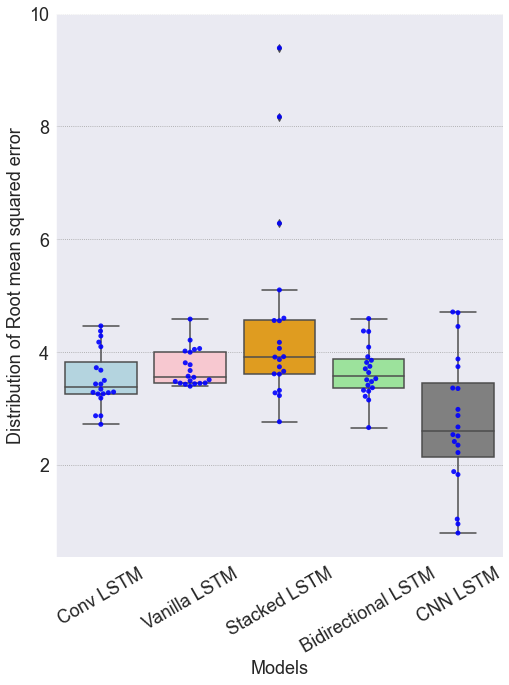

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize=(8,10))

sns.boxplot("Models", "RMSE", data=data,
               palette=["lightblue", "pink", "orange","lightgreen","grey"])
sns.swarmplot("Models", "RMSE", data=data, palette=["blue", "blue", "blue","blue","blue"], alpha=0.9)

plt.ylabel("Distribution of Root mean squared error",fontsize=18)

plt.xlabel("Models",fontsize=18)
plt.xticks(fontsize=18, rotation=30)
plt.yticks([2,4,6,8,10],fontsize=18)
plt.savefig('Boxplot_lstm_M.jpeg',dpi=400)
plt.show()